In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.show()
sns.set()

In [17]:
# Importing the relevant data sets
dfRed = pd.read_csv('~/Git/ConvexOptimizationWithPython/Data/winequality-red.csv', sep=';')
dfWhite = pd.read_csv('~/Git/ConvexOptimizationWithPython/Data/winequality-white.csv', sep=';')

# Combining the data sets
dfRed['red'] = 1
dfWhite['red'] = 0
dfWine = pd.concat([dfRed,dfWhite])

dfRed = pd.read_csv('~/Git/ConvexOptimizationWithPython/Data/winequality-red.csv', sep=';')
dfWhite = pd.read_csv('~/Git/ConvexOptimizationWithPython/Data/winequality-white.csv', sep=';')
dfRed['wineType'] = 'red'
dfWhite['wineType'] = 'white'
dfWine2 = pd.concat([dfRed, dfWhite])

In [18]:
dfWine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
red                     6497 non-null int64
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [19]:
dfWine2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
wineType                6497 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [24]:
dfWine2.columns[0:11]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [23]:
dfWine2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wineType
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [29]:
wineQuant = dfWine2.columns[0:11]
round(dfRed[wineQuant].describe(),2).T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.32,1.74,4.60,7.10,7.90,9.20,15.90
volatile acidity,1599.0,0.53,0.18,0.12,0.39,0.52,0.64,1.58
citric acid,1599.0,0.27,0.19,0.00,0.09,0.26,0.42,1.00
residual sugar,1599.0,2.54,1.41,0.90,1.90,2.20,2.60,15.50
chlorides,1599.0,0.09,0.05,0.01,0.07,0.08,0.09,0.61
free sulfur dioxide,1599.0,15.87,10.46,1.00,7.00,14.00,21.00,72.00
total sulfur dioxide,1599.0,46.47,32.90,6.00,22.00,38.00,62.00,289.00
density,1599.0,1.00,0.00,0.99,1.00,1.00,1.00,1.00
pH,1599.0,3.31,0.15,2.74,3.21,3.31,3.40,4.01
sulphates,1599.0,0.66,0.17,0.33,0.55,0.62,0.73,2.00


In [32]:
reds = round(dfRed[wineQuant].describe(),2)
whites = round(dfWhite[wineQuant].describe(),2)
pd.concat([reds,whites], axis = 1, keys = ['Red Stats', 'White Stats']).T

count    mean    std   min     25%     50%  \
Red Stats   fixed acidity         1599.0    8.32   1.74  4.60    7.10    7.90   
            volatile acidity      1599.0    0.53   0.18  0.12    0.39    0.52   
            citric acid           1599.0    0.27   0.19  0.00    0.09    0.26   
            residual sugar        1599.0    2.54   1.41  0.90    1.90    2.20   
            chlorides             1599.0    0.09   0.05  0.01    0.07    0.08   
            free sulfur dioxide   1599.0   15.87  10.46  1.00    7.00   14.00   
            total sulfur dioxide  1599.0   46.47  32.90  6.00   22.00   38.00   
            density               1599.0    1.00   0.00  0.99    1.00    1.00   
            pH                    1599.0    3.31   0.15  2.74    3.21    3.31   
            sulphates             1599.0    0.66   0.17  0.33    0.55    0.62   
            alcohol               1599.0   10.42   1.07  8.40    9.50   10.20   
White Stats fixed acidity         4898.0    6.85   0.84  3.80    6.30    6.80   
            volatile acidity      4898.0    0.28   0.10  0.08    0.21    0.26   
            citric acid           4898.0    0.33   0.12  0.00    0.27    0.32   
            residual sugar        4898.0    6.39   5.07  0.60    1.70    5.20   
            chlorides             4898.0    0.05   0.02  0.01    0.04    0.04   
            free sulfur dioxide   4898.0   35.31  17.01  2.00   23.00   34.00   
            total sulfur dioxide  4898.0  138.36  42.50  9.00  108.00  134.00   
            density               4898.0    0.99   0.00  0.99    0.99    0.99   
            pH                    4898.0    3.19   0.15  2.72    3.09    3.18   
            sulphates             4898.0    0.49   0.11  0.22    0.41    0.47   
            alcohol               4898.0   10.51   1.23  8.00    9.50   10.40   

                                     75%     max  
Red Stats   fixed acidity           9.20   15.90  
            volatile acidity        0.64    1.58  
            citric acid             0.42    1.00  
            residual sugar          2.60   15.50  
            chlorides               0.09    0.61  
            free sulfur dioxide    21.00   72.00  
            total sulfur dioxide   62.00  289.00  
            density                 1.00    1.00  
            pH                      3.40    4.01  
            sulphates               0.73    2.00  
            alcohol                11.10   14.90  
White Stats fixed acidity           7.30   14.20  
            volatile acidity        0.32    1.10  
            citric acid             0.39    1.66  
            residual sugar          9.90   65.80  
            chlorides               0.05    0.35  
            free sulfur dioxide    46.00  289.00  
            total sulfur dioxide  167.00  440.00  
            density                 1.00    1.04  
            pH                      3.28    3.82  
            sulphates               0.55    1.08  
            alcohol                11.40   14.20

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111c883c8>,
      dtype=object)

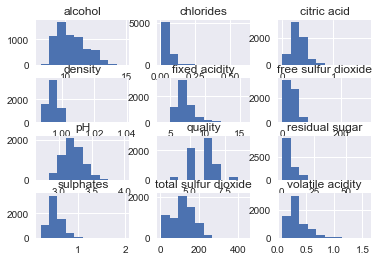

In [35]:
dfWine2.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111f951d0>,
      dtype=object)

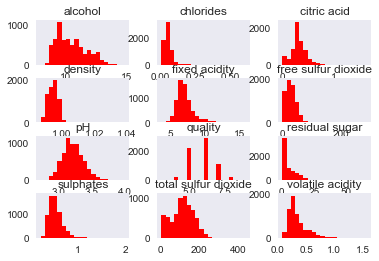

In [36]:
dfWine2.hist(bins = 20, color = 'red', grid = False)

In [37]:
import matplotlib.pyplot as plt
plt.show()

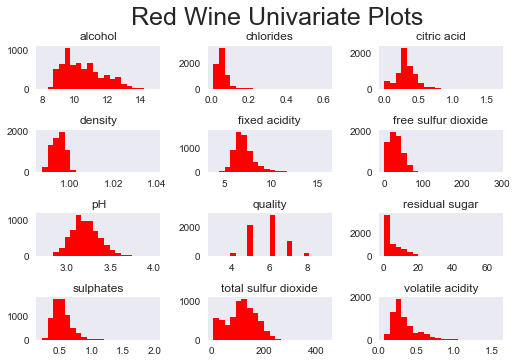

In [38]:
dfWine2.hist(bins = 20, color = 'red', grid = False)
plt.tight_layout(rect = (0,0,1.2,1.2))
wt = plt.suptitle('Red Wine Univariate Plots', x = 0.65, y = 1.25, fontsize = 25)

In [43]:
round(dfWine2.corr(),2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.00,0.22,0.32,-0.11,0.30,-0.28,-0.33,0.46,-0.25,0.30,-0.10,-0.08
volatile acidity,0.22,1.00,-0.38,-0.20,0.38,-0.35,-0.41,0.27,0.26,0.23,-0.04,-0.27
citric acid,0.32,-0.38,1.00,0.14,0.04,0.13,0.20,0.10,-0.33,0.06,-0.01,0.09
residual sugar,-0.11,-0.20,0.14,1.00,-0.13,0.40,0.50,0.55,-0.27,-0.19,-0.36,-0.04
chlorides,0.30,0.38,0.04,-0.13,1.00,-0.20,-0.28,0.36,0.04,0.40,-0.26,-0.20
free sulfur dioxide,-0.28,-0.35,0.13,0.40,-0.20,1.00,0.72,0.03,-0.15,-0.19,-0.18,0.06
total sulfur dioxide,-0.33,-0.41,0.20,0.50,-0.28,0.72,1.00,0.03,-0.24,-0.28,-0.27,-0.04
density,0.46,0.27,0.10,0.55,0.36,0.03,0.03,1.00,0.01,0.26,-0.69,-0.31
pH,-0.25,0.26,-0.33,-0.27,0.04,-0.15,-0.24,0.01,1.00,0.19,0.12,0.02
sulphates,0.30,0.23,0.06,-0.19,0.40,-0.19,-0.28,0.26,0.19,1.00,-0.00,0.04


(array([7.660e+02, 3.113e+03, 2.059e+03, 4.200e+02, 1.260e+02, 5.000e+00,
        6.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([0.   , 0.166, 0.332, 0.498, 0.664, 0.83 , 0.996, 1.162, 1.328,
        1.494, 1.66 ]),
 <a list of 10 Patch objects>)

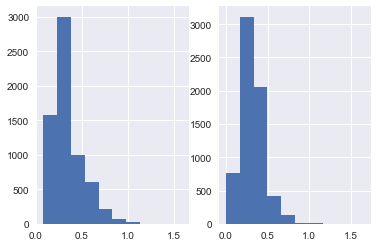

In [46]:
x = dfWine2.iloc[:,1].tolist()
y = dfWine2.iloc[:,2].tolist()
fig, axs = plt.subplots(1,2)
axs[0].hist(x)
axs[1].hist(y)

/Users/mbair/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


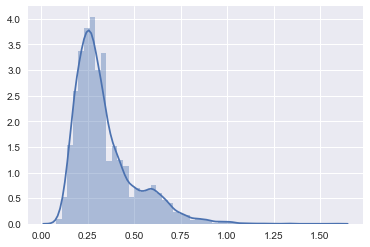

In [47]:
sns.distplot(x)

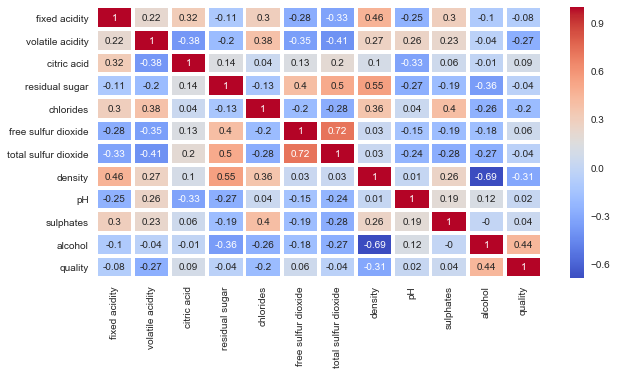

In [48]:
f, ax = plt.subplots(figsize = (10,5))
sns.heatmap(round(dfWine2.corr(),2), cmap = 'coolwarm', linecolor = 'white', annot = True, linewidths = 3)

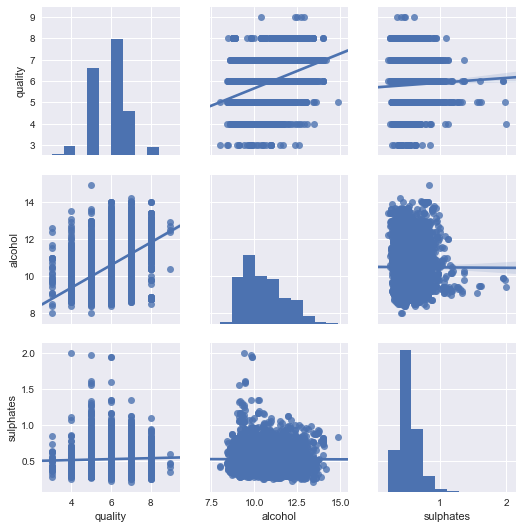

In [76]:
#f, ax = plt.subplots(figsize = (10,5))
sns.pairplot(dfWine[['quality', 'alcohol', 'sulphates']], kind = 'reg')

In [56]:
dfWine2.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'wineType'],
      dtype='object')

In [60]:
dfWine2[['quality', 'alcohol', 'sulphates']]

,quality,alcohol
0,5,9.400000
1,5,9.800000
2,5,9.800000
3,6,9.800000
4,5,9.400000
5,5,9.400000
6,5,9.400000
7,7,10.000000
8,7,9.500000
9,5,10.500000
